[8.71, 4.01, 6.56, 5.79, 3.74, 3.58, 6.41, 3.24, 4.74, 3.63, 7.09, 7.41, 6.34, 7.66, 7.02, 8.6, 5.67, 8.05, 8.18, 6.56, 6.58, 5.96, 8.72, 5.64, 6.61, 7.33, 5.2, 7.38, 5.3, 4.25]


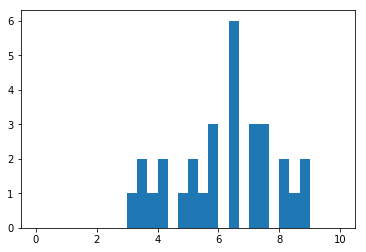

[0.00376618 0.01440575 0.0483223  0.05985092 0.0717914  0.08566701
 0.08732747 0.09340486 0.14126499 0.18174048 0.19472858 0.2076613
 0.3604156  0.41151814 0.42522484 0.46506045 0.46599097 0.47744761
 0.50715031 0.50989214 0.5162367  0.51824447 0.52842326 0.57147598
 0.59709893 0.63487294 0.63495948 0.70398956 0.85627433 0.88789221]


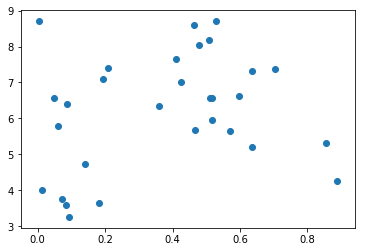

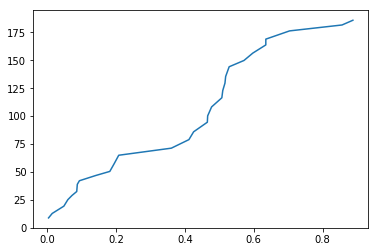

In [17]:
import numpy as np

# We imagine a set of contributions from unique funders
N_SAMPLES = 30
contributions = [
    # a list of N_SAMPLES elements, each a float between 0 and 9, following an inverse power law distribution
    # sample from a power law distribution, then scale it to be between 0 and 9, then round to 2 decimal places, N_SAMPLES times
    round(np.random.power(2) * 9, 2) for _ in range(N_SAMPLES)
    # (1 - (np.random.power(2, N_SAMPLES))) * 9,
]
print(contributions)


# plot these contributions as a histogram
import matplotlib.pyplot as plt
# show N_SAMPLES bins from x=0 to x=N_SAMPLES
plt.hist(contributions, bins=N_SAMPLES, range=(0, 10))
plt.show()


# Now we extend the contributions with another dimension of time
# Each contribution time is a value between 0 and 1
contribution_times = (1 - (np.random.power(2, N_SAMPLES)))
contribution_times.sort()
print(contribution_times)

# We can plot the contributions as a scatter plot
plt.scatter(contribution_times, contributions)
plt.show()

# Plot the cumulative sum of contributions over time
plt.plot(contribution_times, np.cumsum(contributions))
plt.show()


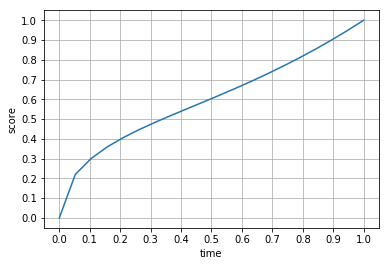

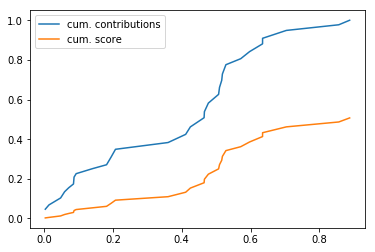

In [18]:
# import sqrt
from math import sqrt

# Define a score function which weights a contribution x and the time it is made t.
def score(cont, t):
    # f(x) begins as a sqrt, and over time becomes a linear function

    # simple function which is linear
    linear = cont * t

    # gradient function
    # return the natural log of the contribution, multiplied by the time
    # numpy compute the inverse natural log of the contribution, then multiply by the time
    # gradient = np.log(cont) * t
    gradient = cont * np.sqrt(t)

    # transition between the two functions
    # declaratively
    return gradient * (1 - t) + linear * t

    # at 0.5, it becomes a linear function
    # if t >= 0.5:
    #     return cont
    # # before 0.5, it is a sqrt function
    # else:
    #     return sqrt(cont)
    
    # Convert the above code to a smooth transition between the two functions
    # return sqrt(x) * (1 - t) + x * t


# Plot the score function, for x between 0 and 10, and t between 0 and 1
# x = np.linspace(0, 10, 20)
t = np.linspace(0, 1, 20)
# plot score for t
plt.plot(t, [score(1, t) for t in t])
# label the x,y in 0.1 increments with gridlines
plt.xticks(np.arange(0, 1.1, 0.1))
plt.yticks(np.arange(0, 1.1, 0.1))
# label the x axis time
plt.xlabel("time")
# label the y axis score
plt.ylabel("score")
plt.grid()
plt.show()



# Plot the original cumulative sum of contributions over time, and the score weighted cumulative sum

# Plot the normalised cumulative sum of contributions over time
plt.plot(contribution_times, np.cumsum(contributions) / np.sum(contributions), label="cum. contributions")
# Plot the normalised cumulative sum of score weighted contributions over time
plt.plot(contribution_times, np.cumsum([score(x, t) for x, t in zip(contributions, contribution_times)]) / np.sum(contributions), label="cum. score")

plt.legend()
plt.show()

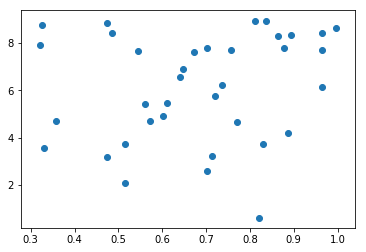

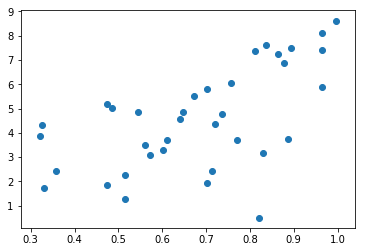

In [38]:
import numpy as np
import matplotlib.pyplot as plt
# Now we run the proper NFT simulation.
# Initial supply is 125.
initial_supply = 250
# Minimum commitment is 0.1.

# There are 125 people who stake into the fundraising phase.
n_stakers = 36
# Each person stakes a random amount, following a power law distribution.
# 60% of people stake within the first 20% of the fundraising phase.
# 40% of people stake within the last 80% of the fundraising phase.
# There is one staker (a whale) who stakes 50% of the total supply at the 70th percentile of the fundraising phase.

# This is an array of pairs of (stake, time)
stakes = [
    # a list of N_SAMPLES elements, each a float between 0 and 9, following an inverse power law distribution
    # sample from a power law distribution, then scale it to be between 0 and 9, then round to 2 decimal places, N_SAMPLES times
    (round(np.random.power(2) * 9, 2), np.random.power(2)) for _ in range(n_stakers)
    # (1 - (np.random.power(2, N_SAMPLES))) * 9,
]

stakes.sort(key=lambda x: x[1])

# Plot the stakes as a scatter plot
plt.scatter([t for _, t in stakes], [s for s, _ in stakes])
plt.show()



# Now plot the score weighted stakes as a scatter plot
plt.scatter([t for _, t in stakes], [score(s, t) for s, t in stakes])
plt.show()


total_stake 220.01000000000005
nft_price 0.8800400000000002


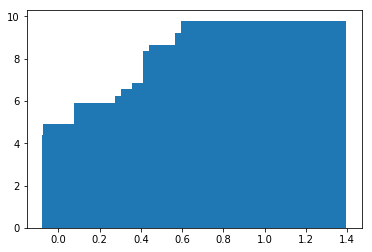

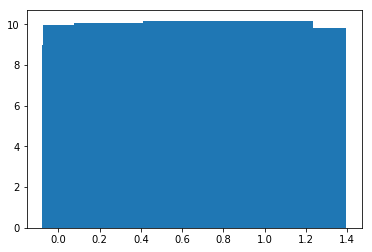

In [60]:
# calculate the total stake committed
total_stake = sum([s for s, _ in stakes])
print("total_stake", total_stake)

# calculate the NFT price, whcih is the total stake divided by the initial supply
nft_price = total_stake / initial_supply
print("nft_price", nft_price)

# each staker gets a number of NFTs equal to their score weighted stake divided by the NFT price
nfts = [(s, t, score(s, t) / nft_price) for s, t in stakes]
nfts2 = [(s, t, s / nft_price) for s, t in stakes]

# plot the NFTs as a scatter plot
plt.bar([t for _, t, _ in nfts], [n for _, _, n in nfts])
plt.show()

# plot the NFTs as a bar chart
plt.bar([t for _, t, _ in nfts2], [n for _, _, n in nfts2])
plt.show()